<a href="https://colab.research.google.com/github/Ravikiran-Bhonagiri/Feature-Engineering/blob/main/Audio_Features_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df_features = pd.read_csv('/content/audio_features.csv')
df_features.drop(columns=['audio_file'], inplace=True)

feature_columns = ['zcr_mean', 'spectral_centroid_mean', 'spectral_rolloff_mean',
       'spectral_bandwidth_mean', 'rms_mean', 'mfcc_1_mean', 'mfcc_2_mean',
       'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean',
       'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean',
       'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_mean',
       'spectral_contrast_mean', 'tonnetz_mean', 'onset_strength_mean',
       'harmonic_rms', 'percussive_rms', 'mean_pitch', 'tempo',
       'chroma_cqt_mean', 'spectral_flatness_mean', 'spectral_entropy',
       'crest_factor', 'attack_time', 'decay_time', 'skewness', 'kurtosis']

labels = df_features['audio_label'].to_list()


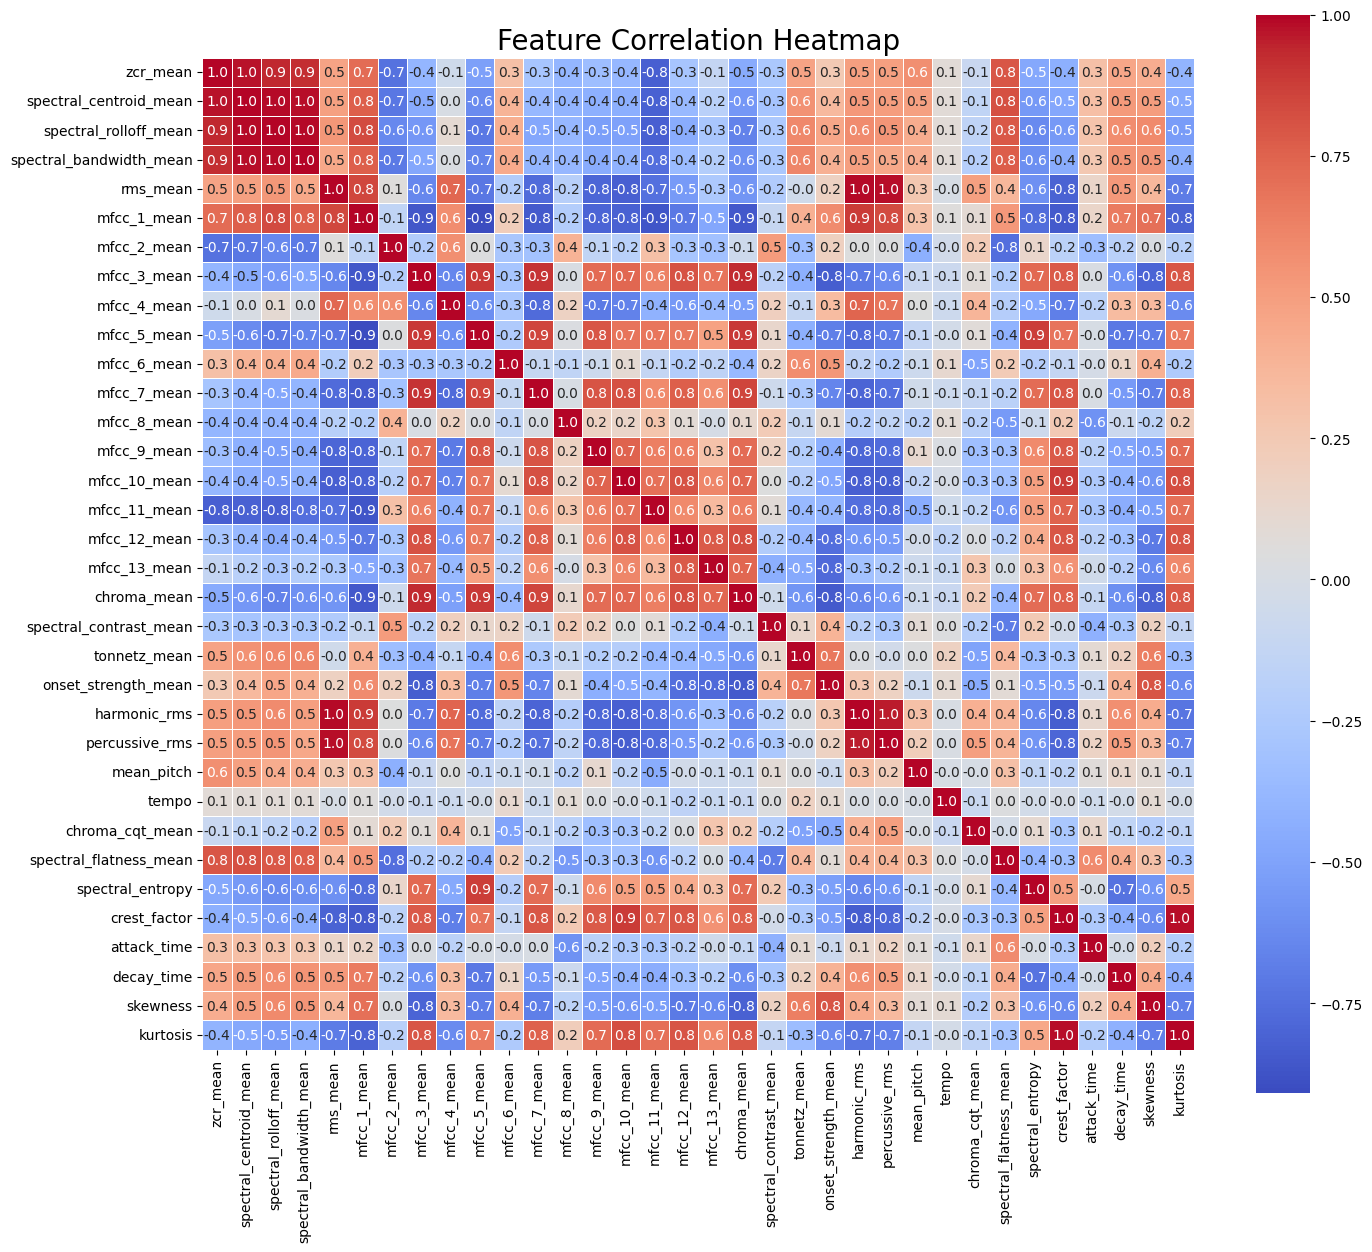

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
    plt.figure(figsize=(16, 14))  # Increased the figure size
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', square=True, linewidths=0.5)
    plt.title("Feature Correlation Heatmap", fontsize=20)
    plt.show()

# Plot the updated correlation heatmap
plot_correlation_heatmap(df_features[feature_columns])



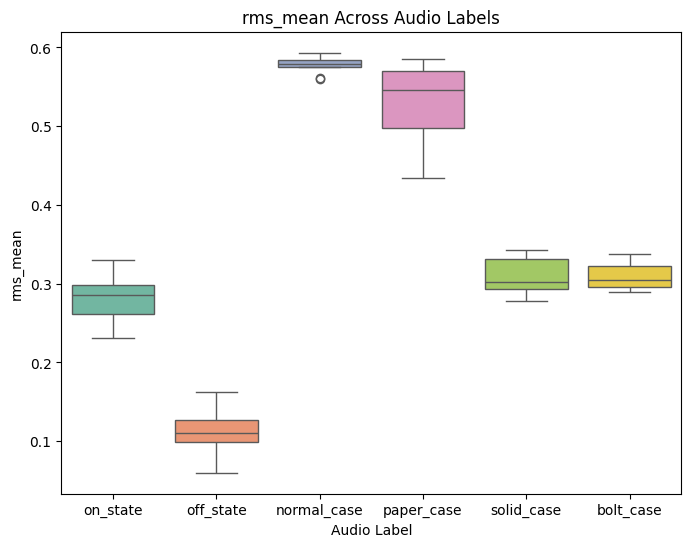

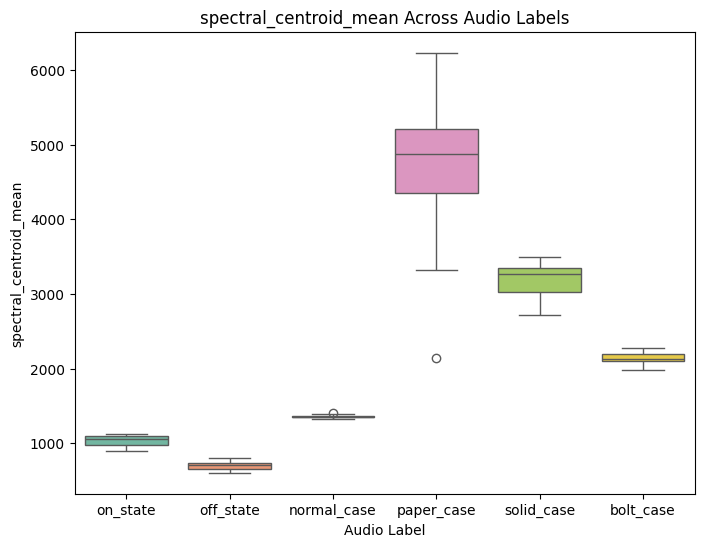

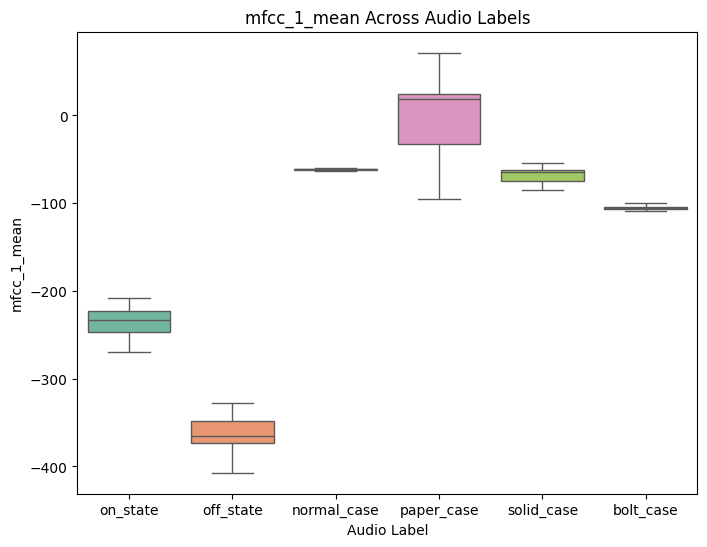

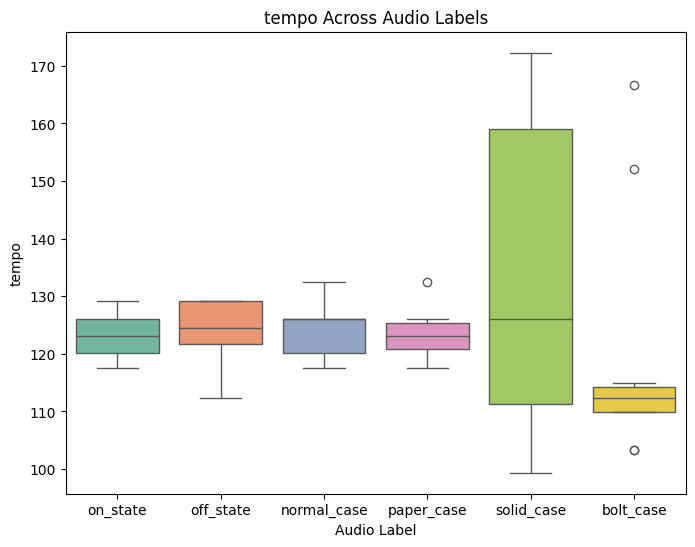

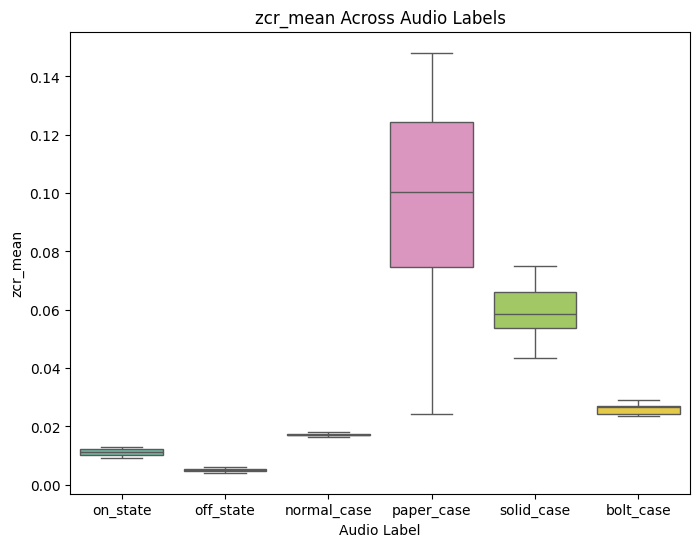

In [ ]:
def plot_feature_by_label(df, feature):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='audio_label', y=feature, palette='Set2')
    plt.title(f'{feature} Across Audio Labels')
    plt.xlabel('Audio Label')
    plt.ylabel(feature)
    plt.show()

# Plot boxplots for selected features across different audio labels
features_to_plot_by_label = ['rms_mean', 'spectral_centroid_mean', 'mfcc_1_mean', 'tempo', 'zcr_mean']
for feature in features_to_plot_by_label:
    plot_feature_by_label(df_features, feature)


<Figure size 1000x800 with 0 Axes>

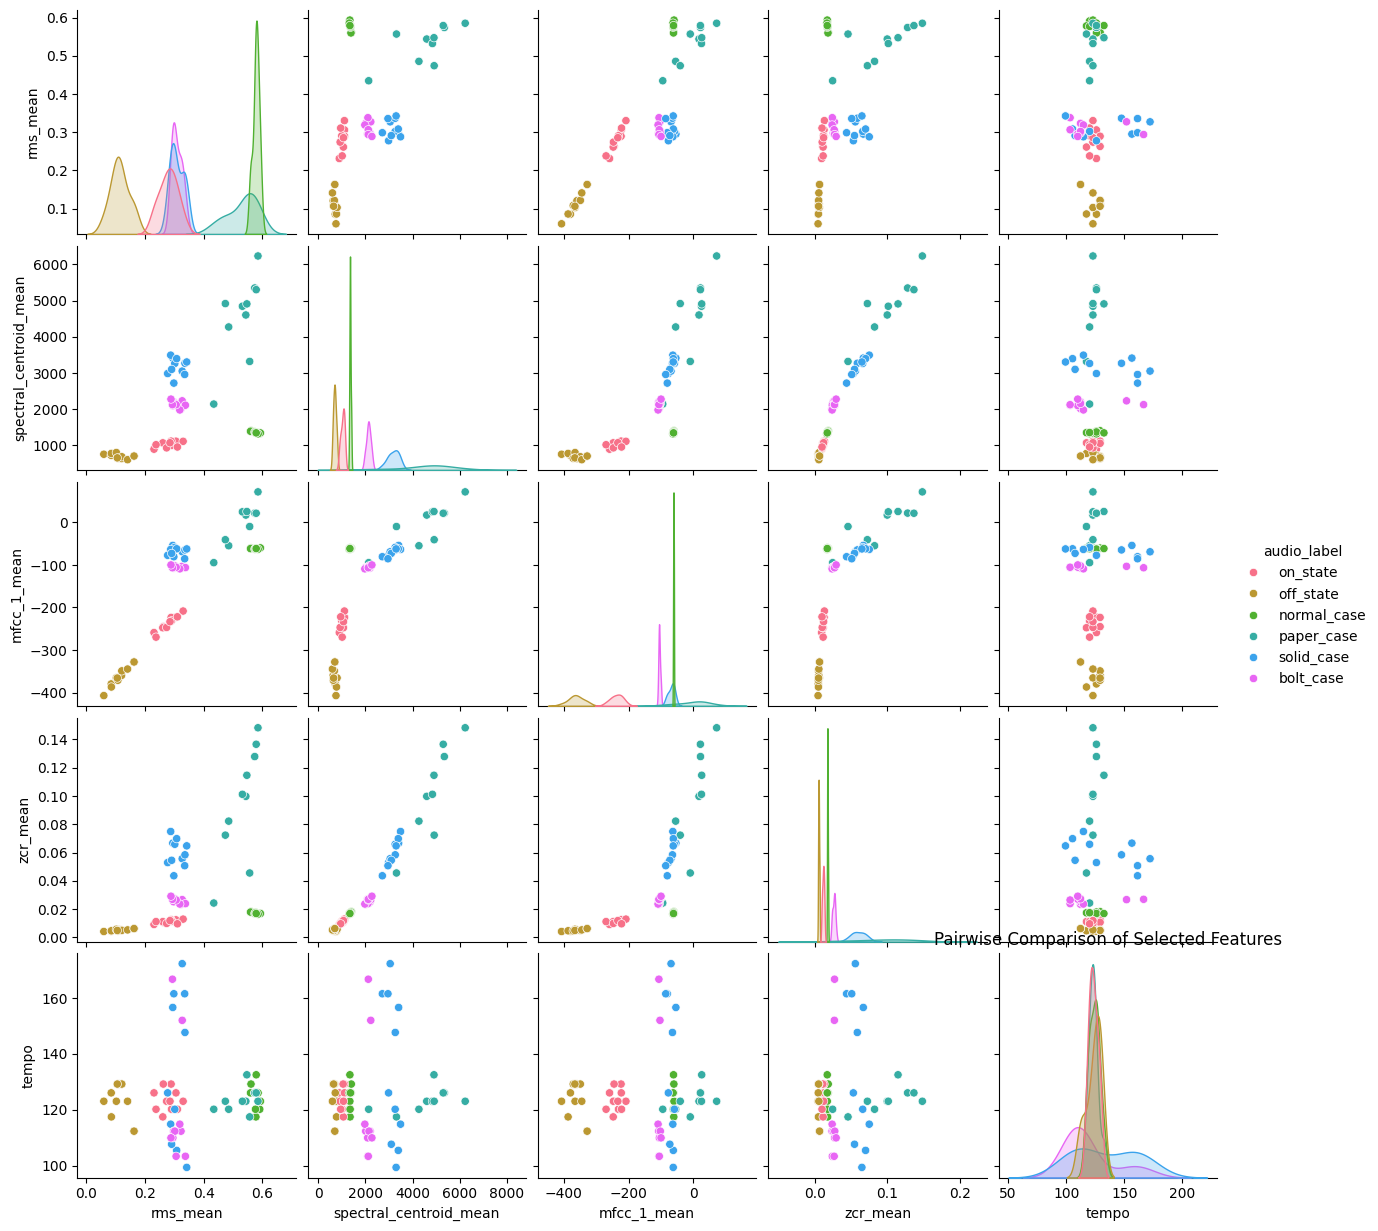

In [ ]:
def plot_pairplot(df, selected_features):
    plt.figure(figsize=(10, 8))
    sns.pairplot(df[selected_features + ['audio_label']], hue='audio_label', palette='husl')
    plt.title("Pairwise Comparison of Selected Features")
    plt.show()

# Selected features for pairplot
selected_features = ['rms_mean', 'spectral_centroid_mean', 'mfcc_1_mean', 'zcr_mean', 'tempo']
plot_pairplot(df_features, selected_features)


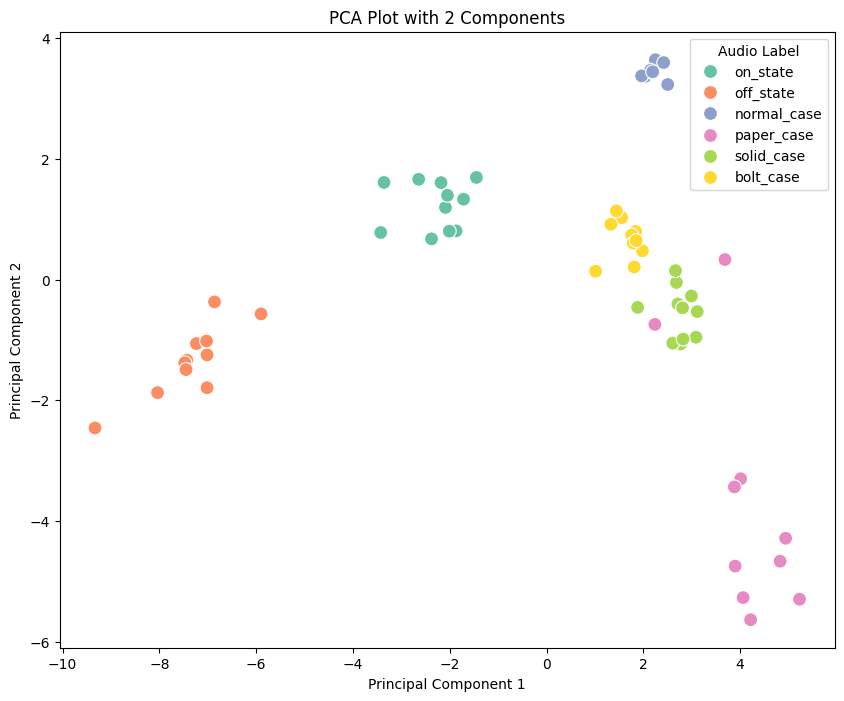

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Function to fill missing values, perform PCA, and plot
def fill_missing_and_plot_pca(df, feature='mean_pitch', n_components=2):
    """
    Fill missing values for the given feature with the mean of the corresponding label group,
    perform PCA, and plot.

    Parameters:
        df (DataFrame): The input dataframe.
        feature (str): The feature for which missing values should be filled.
        n_components (int): Number of PCA components.
    """
    # Fill missing values with the mean of the 'audio_label' group
    df[feature] = df.groupby('audio_label')[feature].transform(lambda x: x.fillna(x.mean()))

    # Drop non-numeric columns for PCA
    df_pca = df.drop(columns=['audio_file'], errors='ignore')

    # Normalize the features (excluding audio_label)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df_pca.drop(columns=['audio_label'], errors='ignore'))

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(normalized_data)

    # Add PCA components to DataFrame
    df['pca_1'] = pca_features[:, 0]
    df['pca_2'] = pca_features[:, 1]

    # Plot the PCA components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='pca_1', y='pca_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title(f'PCA Plot with {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()

# Perform PCA and plot
fill_missing_and_plot_pca(df_features, feature='mean_pitch', n_components=2)


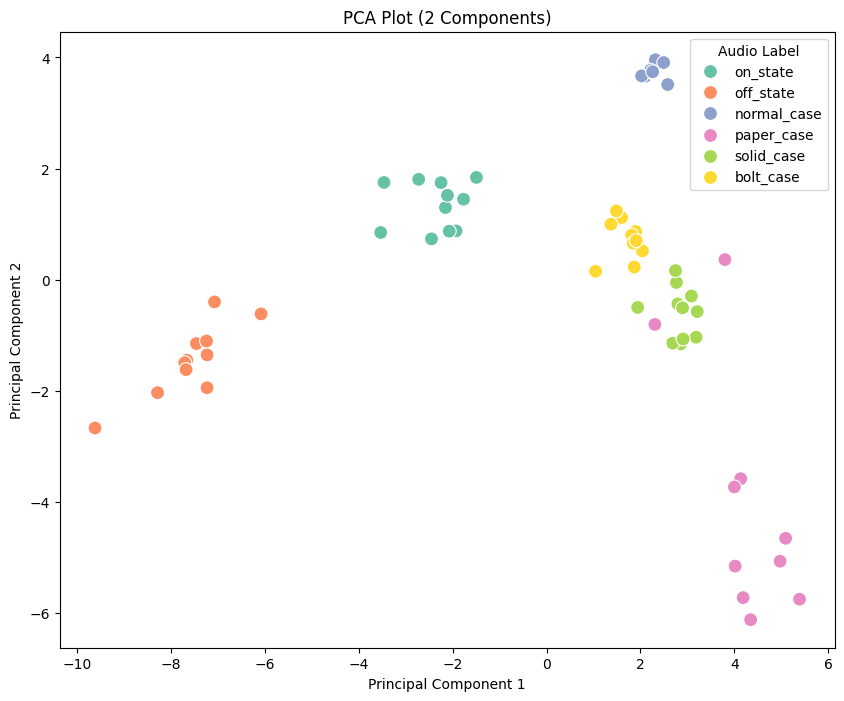

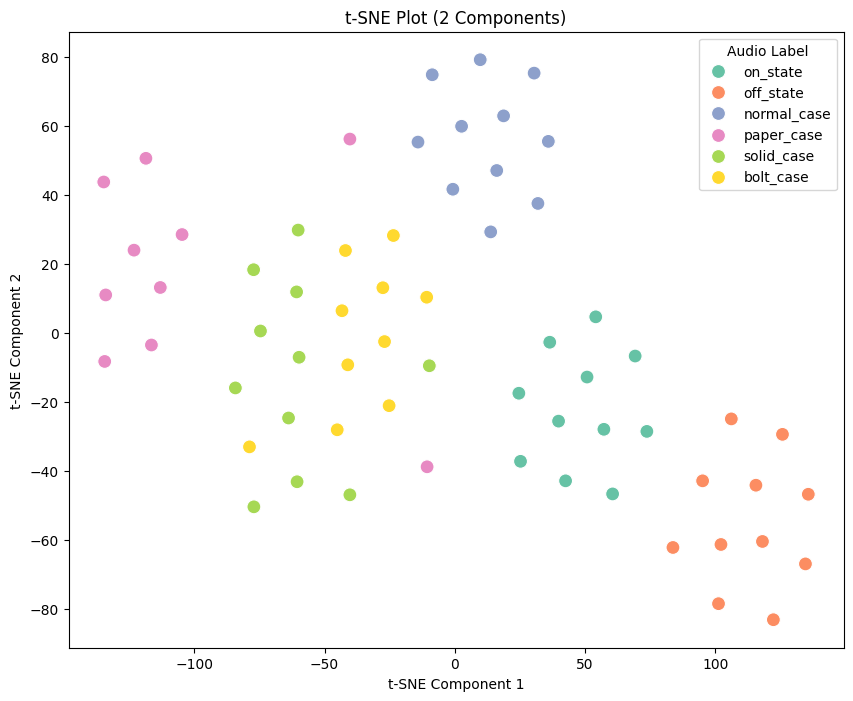

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

def perform_pca_tsne(df, feature='mean_pitch', n_components=2, perplexity=30, learning_rate=200):
    """
    Fill missing values, perform PCA and t-SNE, and plot both.

    Parameters:
        df (DataFrame): The input dataframe.
        feature (str): The feature for which missing values should be filled.
        n_components (int): Number of PCA/t-SNE components.
        perplexity (int): Perplexity parameter for t-SNE.
        learning_rate (float): Learning rate for t-SNE.
    """
    # Fill missing values with the mean of the 'audio_label' group
    df[feature] = df.groupby('audio_label')[feature].transform(lambda x: x.fillna(x.mean()))

    # Drop non-numeric columns for PCA and t-SNE
    df_data = df.drop(columns=['audio_file'], errors='ignore')

    # Normalize the features (excluding audio_label)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df_data.drop(columns=['audio_label'], errors='ignore'))

    # Perform PCA for comparison
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(normalized_data)
    df['pca_1'] = pca_features[:, 0]
    df['pca_2'] = pca_features[:, 1]

    # Perform t-SNE
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
    tsne_features = tsne.fit_transform(normalized_data)
    df['tsne_1'] = tsne_features[:, 0]
    df['tsne_2'] = tsne_features[:, 1]

    # Plot PCA
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='pca_1', y='pca_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title('PCA Plot (2 Components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()

    # Plot t-SNE
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='tsne_1', y='tsne_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title('t-SNE Plot (2 Components)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()

# Perform PCA and t-SNE
perform_pca_tsne(df_features, feature='mean_pitch', n_components=2, perplexity=30, learning_rate=200)
